<a href="https://colab.research.google.com/github/MamadouBousso/IAProjects/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression Linéaire**
Cette premiére partie est consacrée à la création d'un modéle de regression linéaire pour prédire les effets des changements climatiques.
Vous pourrez utiliser tous les documents de cours et bibliothéques nécessaires de python.

De nombreuses études ont démontré que la température mondiale moyenne a augmenté au cours du siècle dernier. Les conséquences d'une augmentation continue de la température mondiale seront désastreuses. L'élévation du niveau de la mer et une fréquence accrue d'événements météorologiques extrêmes toucheront des milliards de personnes.

Dans ce problème, nous tenterons d'étudier la relation entre la température moyenne mondiale et plusieurs autres facteurs.

Le fichier Climate_change (CSV) contient des données climatiques de mai 1983 à décembre 2008. Les variables disponibles incluent:

**Année:** l'année d'observation.

**Mois:** le mois d'observation.

**Temp:** la différence en degrés Celsius entre la température globale moyenne pendant cette période et une valeur de référence. Ces données proviennent de l'Unité de recherche climatique de l'Université d'East Anglia.

**CO2, N2O, CH4, CFC.11, CFC.12:** concentrations atmosphériques de dioxyde de carbone (CO2), d'oxyde nitreux (N2O), de méthane (CH4), de trichlorofluorométhane (CCl3F; communément appelé CFC-11) et de dichlorodifluorométhane (CCl2F2 ; communément appelé CFC-12), respectivement. Ces données proviennent de la Division de surveillance mondiale ESRL / NOAA.
Le CO2, N2O et CH4 sont exprimés en ppmv (parties par million en volume - c'est-à-dire 397 ppmv de CO2 signifie que le CO2 constitue 397 millionièmes du volume total de l'atmosphère)
Les CFC.11 et CFC.12 sont exprimés en ppbv (parties par milliard en volume).

**Aérosols:**
la profondeur optique moyenne des aérosols stratosphériques à 550 nm. Cette variable est liée aux volcans, car les éruptions volcaniques entraînent l'ajout de nouvelles particules à l'atmosphère, ce qui affecte la quantité d'énergie solaire réfléchie dans l'espace. Ces données proviennent du Godard Institute for Space Studies de la NASA.

**TSI:** l'irradiance solaire totale (TSI) en W / m2 (le taux auquel l'énergie solaire est déposée par unité de surface). En raison des taches solaires et d'autres phénomènes solaires, la quantité d'énergie émise par le soleil varie considérablement avec le temps. Ces données proviennent du site web du projet SOLARIS-HEPPA.

**MEI:** indice d'oscillation australe multivarié El Nino (MEI), une mesure de la force de l'oscillation australe El Nino / La Nina (un effet météorologique dans l'océan Pacifique qui affecte les températures mondiales). Ces données proviennent de la Division des Sciences Physiques ESRL / NOAA.

Nous nous intéressons à la manière dont les changements de ces variables affectent les températures futures, ainsi qu'à la façon dont ces variables expliquent les changements de température jusqu'à présent. Pour ce faire, lisez d'abord le jeu de données Climate_change.csv dans python avec pandas.

Ensuite, divisez les données en un ensemble d'apprentissage, composé de toutes les observations jusqu'en 2006 inclusivement, et un ensemble de test comprenant les années restantes (indice: utiliser un sous-ensemble). Un ensemble d'apprentissage fait référence aux données qui seront utilisées pour construire le modèle (ce sont les données que nous donnons à la fonction lm ()), et un ensemble de test fait référence aux données que nous utiliserons pour tester notre capacité prédictive.

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/ml-coursera-python-assignments/Devoir1LinearRegLogisticReg'
import sys
sys.path.append(path)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from scipy import optimize
%matplotlib inline

**Lecture du jeu de données avec pandas et affichage des 10 premiéres lignes**

Nous nous intéressons à la manière dont les changements de ces variables affectent les températures futures, ainsi qu'à la façon dont ces variables expliquent les changements de température jusqu'à présent. Pour ce faire, lisez d'abord le jeu de données Climate_change.csv avec pandas.


In [69]:
climate_change = pd.read_csv(path+'/Data/climate_change.csv')

In [70]:
climate_change.head(10)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
5,1983,10,0.002,340.30,1663.79,303.970,195.171,359.174,1366.0589,0.0569,0.093
6,1983,11,-0.176,341.53,1658.23,304.032,195.921,360.758,1366.1072,0.0524,0.232
7,1983,12,-0.176,343.07,1654.31,304.082,196.609,362.174,1366.0607,0.0486,0.078
8,1984,1,-0.339,344.05,1658.98,304.130,197.219,363.359,1365.4261,0.0451,0.089
9,1984,2,-0.565,344.77,1656.48,304.194,197.759,364.296,1365.6618,0.0416,0.013


**Quelles sont vos remarques par rapport à ces données?**

**Valeurs manquantes:**

Rechercher les valeurs manquantes et supprimer les lignes où elles se trouvent s'il y en a. 

In [71]:
# Valeurs manquantes

total_missing = climate_change.isnull().sum().sort_values(ascending=False)
percent_missing = (climate_change.isnull().sum()/climate_change.isnull().count()).sort_values(ascending=False)
percent_missing

Temp        0.0
Aerosols    0.0
TSI         0.0
CFC-12      0.0
CFC-11      0.0
N2O         0.0
CH4         0.0
CO2         0.0
MEI         0.0
Month       0.0
Year        0.0
dtype: float64

**Coloones Year, Month et y**
Enlever les colonnes sur Year et Month et mettre la colonne Temp dans une variable y qui representera les températures

In [72]:
climate_change = climate_change.drop(['Year','Month'],axis=1)

In [73]:
y = climate_change['Temp']

In [74]:
climate_change = climate_change.drop(['Temp'],axis=1)

**Standardisation des données:**

Les données ne sont pas à la même échelle. Il est important de les standardiser. Pour cela vous allez utiliser la bibliothéque scikit-learn(https://scikit-learn.org/stable/). 

StandardScaler permet de tout standardiser et de transformer les colonnes du Dataframe. Il est important de noter que StandardScaler retourne un numpy array

In [86]:
scaler = StandardScaler()
climate_change[climate_change.columns] = scaler.fit_transform(climate_change[climate_change.columns])


**Description du nouveau dataframe**

Decrivez le nouveau dataframe avec la fonction describe() de pandans

In [76]:
climate_change

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
0,2.435346,-1.367493,-2.419359,-1.670583,-3.002591,-2.553339,0.079308,2.401281
1,2.019923,-1.402340,-2.525499,-1.657356,-2.966302,-2.523287,0.125428,2.163370
2,1.564986,-1.510841,-2.536157,-1.647963,-2.928626,-2.490775,0.536998,1.946146
3,0.912484,-1.661317,-2.576829,-1.639529,-2.889812,-2.457726,0.875879,1.746163
4,0.162800,-1.826049,-2.205991,-1.627644,-2.850701,-2.425994,0.407913,1.559971
...,...,...,...,...,...,...,...,...
303,-0.578341,1.657080,0.653709,1.727772,-0.384826,0.650360,-1.037093,-0.450209
304,-0.980949,1.573130,0.984310,1.751542,-0.390618,0.649945,-1.017793,-0.426074
305,-1.127255,1.565210,1.399737,1.802724,-0.390767,0.647849,-0.989720,-0.415730
306,-0.957454,1.655496,1.360369,1.844322,-0.383588,0.647485,-0.913021,-0.408834


**Creation des ensembles d'apprentissage, de validation et de test**

Vous utiliserez la bibliothéque scikit-learn pour determiner les ensembles d'apprentissage( 80%),  et de test(20%). La fonction train_test_split() (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html ) de sklean.model_selection permet de creer proprement les ensembles

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(climate_change,y,test_size=0.20, random_state=42)

**Creation du modele de regression linéaire**

Vous allez implementer les algorithmes du gradient descent et du calcul de la fonction cout regularisée avec la norme L2. Vous ecrirez deux versions de cette fonction: batch gradient descent et stochastic gradient descent. La fonction de calcul du cost function regularisée est deja implémentée pour vous.  Vous pouvez vous reférer au cours

In [49]:
# Fonction coût
def linearRegCostFunction(X, y, theta, lambda_=0.0):
    """
    Compute cost and gradient for regularized linear regression 
    with multiple variables. Computes the cost of using theta as
    the parameter for linear regression to fit the data points in X and y. 
    
    Parameters
    ----------
    X : array_like
        The dataset. Matrix with shape (m x n + 1) where m is the 
        total number of examples, and n is the number of features 
        before adding the bias term.
    
    y : array_like
        The functions values at each datapoint. A vector of
        shape (m, ).
    
    theta : array_like
        The parameters for linear regression. A vector of shape (n+1,).
    
    lambda_ : float, optional
        The regularization parameter.
    
    Returns
    -------
    J : float
        The computed cost function. 
    
    grad : array_like
        The value of the cost function gradient w.r.t theta. 
        A vector of shape (n+1, ).
    
    Instructions
    ------------
    Compute the cost and gradient of regularized linear regression for
    a particular choice of theta.
    You should set J to the cost and grad to the gradient.
    """
    # Initialize some useful values
    m = y.size # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    
    I = np.ones(theta.shape)
    I[:1]= 0.0
    # ====================== YOUR CODE HERE ======================
    
    #  Utliser le broadcasting entre theta et X, sommer ce vecteur suivant l'axe des colonnes et enlever y
    vect = np.sum(theta*X,axis=1) - y
    theta_reg = theta[1:]
    J = (1/(2*m))*np.sum(vect*vect) + (lambda_/(2*m))*np.linalg.norm(theta_reg,2)
    
    grad = (1/m)*(np.dot(np.dot(theta,X.T)-y,X)) + (lambda_/m)*I*theta
    
    

    # ============================================================
    return J, grad

Une fois que votre fonction de coût et votre gradient fonctionnent correctement, la cellule suivante exécutera le code dans trainLinearReg  pour calculer les valeurs optimales de 𝜃. Cette fonction de formation utilise le module d'optimisation de scipy pour minimiser la fonction de coût.



In [50]:
# Gradient Descent
def trainLinearReg(linearRegCostFunction, X, y, lambda_=0.0, maxiter=200):
    """
    Trains linear regression using scipy's optimize.minimize.

    Parameters
    ----------
    X : array_like
        The dataset with shape (m x n+1). The bias term is assumed to be concatenated.

    y : array_like
        Function values at each datapoint. A vector of shape (m,).

    lambda_ : float, optional
        The regularization parameter.

    maxiter : int, optional
        Maximum number of iteration for the optimization algorithm.

    Returns
    -------
    theta : array_like
        The parameters for linear regression. This is a vector of shape (n+1,).
    """
    # Initialize Theta
    initial_theta = np.zeros(X.shape[1])

    # Create "short hand" for the cost function to be minimized
    costFunction = lambda t: linearRegCostFunction(X, y, t, lambda_)

    # Now, costFunction is a function that takes in only one argument
    options = {'maxiter': maxiter}

    # Minimize using scipy
    res = optimize.minimize(costFunction, initial_theta, jac=True, method='TNC', options=options)
    return res.x


**Execution de la fonction de gradient descent**

In [51]:
# On recupére les données dans un tableau numpy
# On ajoute une collone de 1 pour le bias

X_train_aug = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
theta = trainLinearReg(linearRegCostFunction, X_train_aug, y_train, lambda_=0)



**Visualiser les valeur de theta**

In [52]:
print(theta)

[ 0.25646916  0.05642837  0.06319414  0.00506443 -0.08675245 -0.14730381
  0.25021861  0.03270139 -0.04454011]


**Validation du modéle: courbe d'apprentissage**

Vous allez maintenant implémenter du code pour générer les courbes d'apprentissage qui seront utiles dans le débogage des algorithmes d'apprentissage. Rappelez-vous qu'une courbe d'apprentissage trace les erreurs d'entraînement et de validation croisée en fonction de la taille de l'ensemble d'apprentissage. Votre travail consiste à remplir la fonction learningCurve dans la cellule suivante, de sorte qu'elle renvoie un vecteur d'erreurs pour l'ensemble d'apprentissage et l'ensemble de validation croisée.

Pour tracer la courbe d'apprentissage, nous avons besoin d'une erreur d'ensemble d'entraînement et de validation croisée pour différentes tailles d'ensemble d'entraînement. Pour obtenir différentes tailles d'ensemble d'apprentissage, vous devez utiliser différents sous-ensembles de l'ensemble d'entraînement d'origine X. Plus précisément, pour une taille d'ensemble d'apprentissage de 𝑖, vous devez utiliser les premiers exemples 𝑖 (c'est-à-dire, X [: i,:] et y [: je]).

Vous pouvez utiliser la fonction trainLinearReg (en appelant utils.trainLinearReg (...)) pour trouver les paramètres 𝜃. Notez que lambda_ est passé en paramètre à la fonction learningCurve. Après avoir appris les paramètres 𝜃, vous devez calculer l'erreur sur les ensembles d'apprentissage et de validation croisée. Rappelez-vous que l'erreur d'apprentissage pour un ensemble de données est définie comme:

$$ J_{\text{train}} = \frac{1}{2m} \left[ \sum_{i=1}^m \left(h_\theta \left( x^{(i)} \right) - y^{(i)} \right)^2 \right] $$

En particulier, notez que l'erreur d'entrainement n'inclut pas le terme de régularisation. Une façon de calculer l'erreur d'entraînement consiste à utiliser votre fonction de coût existante et à définir $ \ lambda $ sur 0 uniquement lorsque vous l'utilisez pour calculer l'erreur d'entraînement et l'erreur de validation croisée. Lorsque vous calculez l'erreur d'ensemble d'apprentissage, assurez-vous de la calculer sur le sous-ensemble d'apprentissage (c'est-à-dire, `X [: n,:]` et `y [: n]`) au lieu de l'ensemble d'apprentissage entier. Cependant, pour l'erreur de validation croisée, vous devez la calculer sur  l'ensemble de validation croisée qui est votre ensemble de test dans le cadre de cet exercice. Vous devriez stocker
les erreurs calculées dans deux vecteurs: un pour  le train et un autre pour la validation.


In [56]:
def learningCurve(X, y, Xval, yval, lambda_=0):
    """
    Generates the train and cross validation set errors needed to plot a learning curve
    returns the train and cross validation set errors for a learning curve. 
    
    In this function, you will compute the train and test errors for
    dataset sizes from 1 up to m. In practice, when working with larger
    datasets, you might want to do this in larger intervals.
    
    Parameters
    ----------
    X : array_like
        The training dataset. Matrix with shape (m x n + 1) where m is the 
        total number of examples, and n is the number of features 
        before adding the bias term.
    
    y : array_like
        The functions values at each training datapoint. A vector of
        shape (m, ).
    
    Xval : array_like
        The validation dataset. Matrix with shape (m_val x n + 1) where m is the 
        total number of examples, and n is the number of features 
        before adding the bias term.
    
    yval : array_like
        The functions values at each validation datapoint. A vector of
        shape (m_val, ).
    
    lambda_ : float, optional
        The regularization parameter.
    
    Returns
    -------
    error_train : array_like
        A vector of shape m. error_train[i] contains the training error for
        i examples.
    error_val : array_like
        A vecotr of shape m. error_val[i] contains the validation error for
        i training examples.
    
    Instructions
    ------------
    Fill in this function to return training errors in error_train and the
    cross validation errors in error_val. i.e., error_train[i] and 
    error_val[i] should give you the errors obtained after training on i examples.
    
    Notes
    -----
    - You should evaluate the training error on the first i training
      examples (i.e., X[:i, :] and y[:i]).
    
      For the cross-validation error, you should instead evaluate on
      the _entire_ cross validation set (Xval and yval).
    
    - If you are using your cost function (linearRegCostFunction) to compute
      the training and cross validation error, you should call the function with
      the lambda argument set to 0. Do note that you will still need to use
      lambda when running the training to obtain the theta parameters.
    
    Hint
    ----
    You can loop over the examples with the following:
     
           for i in range(1, m+1):
               # Compute train/cross validation errors using training examples 
               # X[:i, :] and y[:i], storing the result in 
               # error_train[i-1] and error_val[i-1]
               ....  
    """
    # Number of training examples
    m = y.size

    # You need to return these values correctly
    error_train = np.zeros(m)
    error_val   = np.zeros(m)

    # ====================== YOUR CODE HERE ======================
    for i in range(1, m+1):
      # Compute train/cross validation errors using training examples 
      # X[:i, :] and y[:i], storing the result in
      theta = trainLinearReg(linearRegCostFunction,X[:i, :],y[:i])
      error_train[i-1] , _ = linearRegCostFunction(X[:i, :], y[:i], theta, 1)
      error_val[i-1] , _ = linearRegCostFunction(Xval, yval, theta, 1)
      
        
    # =============================================================
    return error_train, error_val

In [57]:
X_test_aug = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
error_train,error_test = learningCurve(X_train_aug, y_train, X_test_aug, y_test, lambda_=0)

**Visualiser la courbe d'apprentissage**

Utiliser seaborn ou matplotlib pour visualiser le learning curve

# Training Examples	Train Error	Cross Validation Error
  	1		0.008843	0.048488
  	2		0.012382	0.052728
  	3		0.037458	0.061021
  	4		0.033628	0.083463
  	5		0.029669	0.089355
  	6		0.031223	0.024039
  	7		0.048585	0.034490
  	8		0.044921	0.026405
  	9		0.046132	0.050530
  	10		0.035404	0.031377
  	11		0.048724	0.031129
  	12		0.066125	0.027657
  	13		0.057407	0.027219
  	14		0.053748	0.026595
  	15		0.051941	0.027950
  	16		0.049098	0.028101
  	17		0.049724	0.029585
  	18		0.049791	0.031681
  	19		0.050526	0.034370
  	20		0.046343	0.032812
  	21		0.038678	0.025898
  	22		0.035903	0.025116
  	23		0.026261	0.017009
  	24		0.025517	0.017456
  	25		0.023331	0.016663
  	26		0.020967	0.015186
  	27		0.020318	0.015250
  	28		0.019132	0.013977
  	29		0.021248	0.015124
  	30		0.019622	0.013951
  	31		0.019204	0.013963
  	32		0.018375	0.013753
  	33		0.017421	0.013404
  	34		0.017081	0.012961
  	35		0.016150	0.012215
  	36		0.014808	0.011453
  	37		0.014397	0.011505
  	38		0.013836	0.011361
  	3

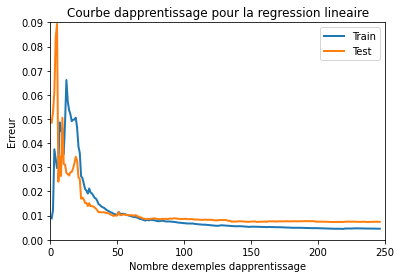

In [60]:
m = y_train.size
plt.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_test, lw=2)
plt.title('Courbe d''apprentissage pour la regression lineaire')
plt.legend(['Train', 'Test'])
plt.xlabel('Nombre d''exemples d''apprentissage')
plt.ylabel('Erreur')
plt.axis([0, 250, 0, 0.09])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_test[i]))

**Question:**

De quoi souffre ce modele:


*   Probléme de biais: underfitting
*   Probléme de variance: overfitting
*   Aucun probléme



**Amelioration du modéle: on cherche les variables corrélées**

Visualisation des données par pairs

Utilisez la bibliothéque seaborn pour visualiser les données par pairs. Cette visualisation permet de voir les corrélations entre les différentes variables. Vous utiliserez la fonction corr() de pandas pour calculer les coefficient de corrélation.

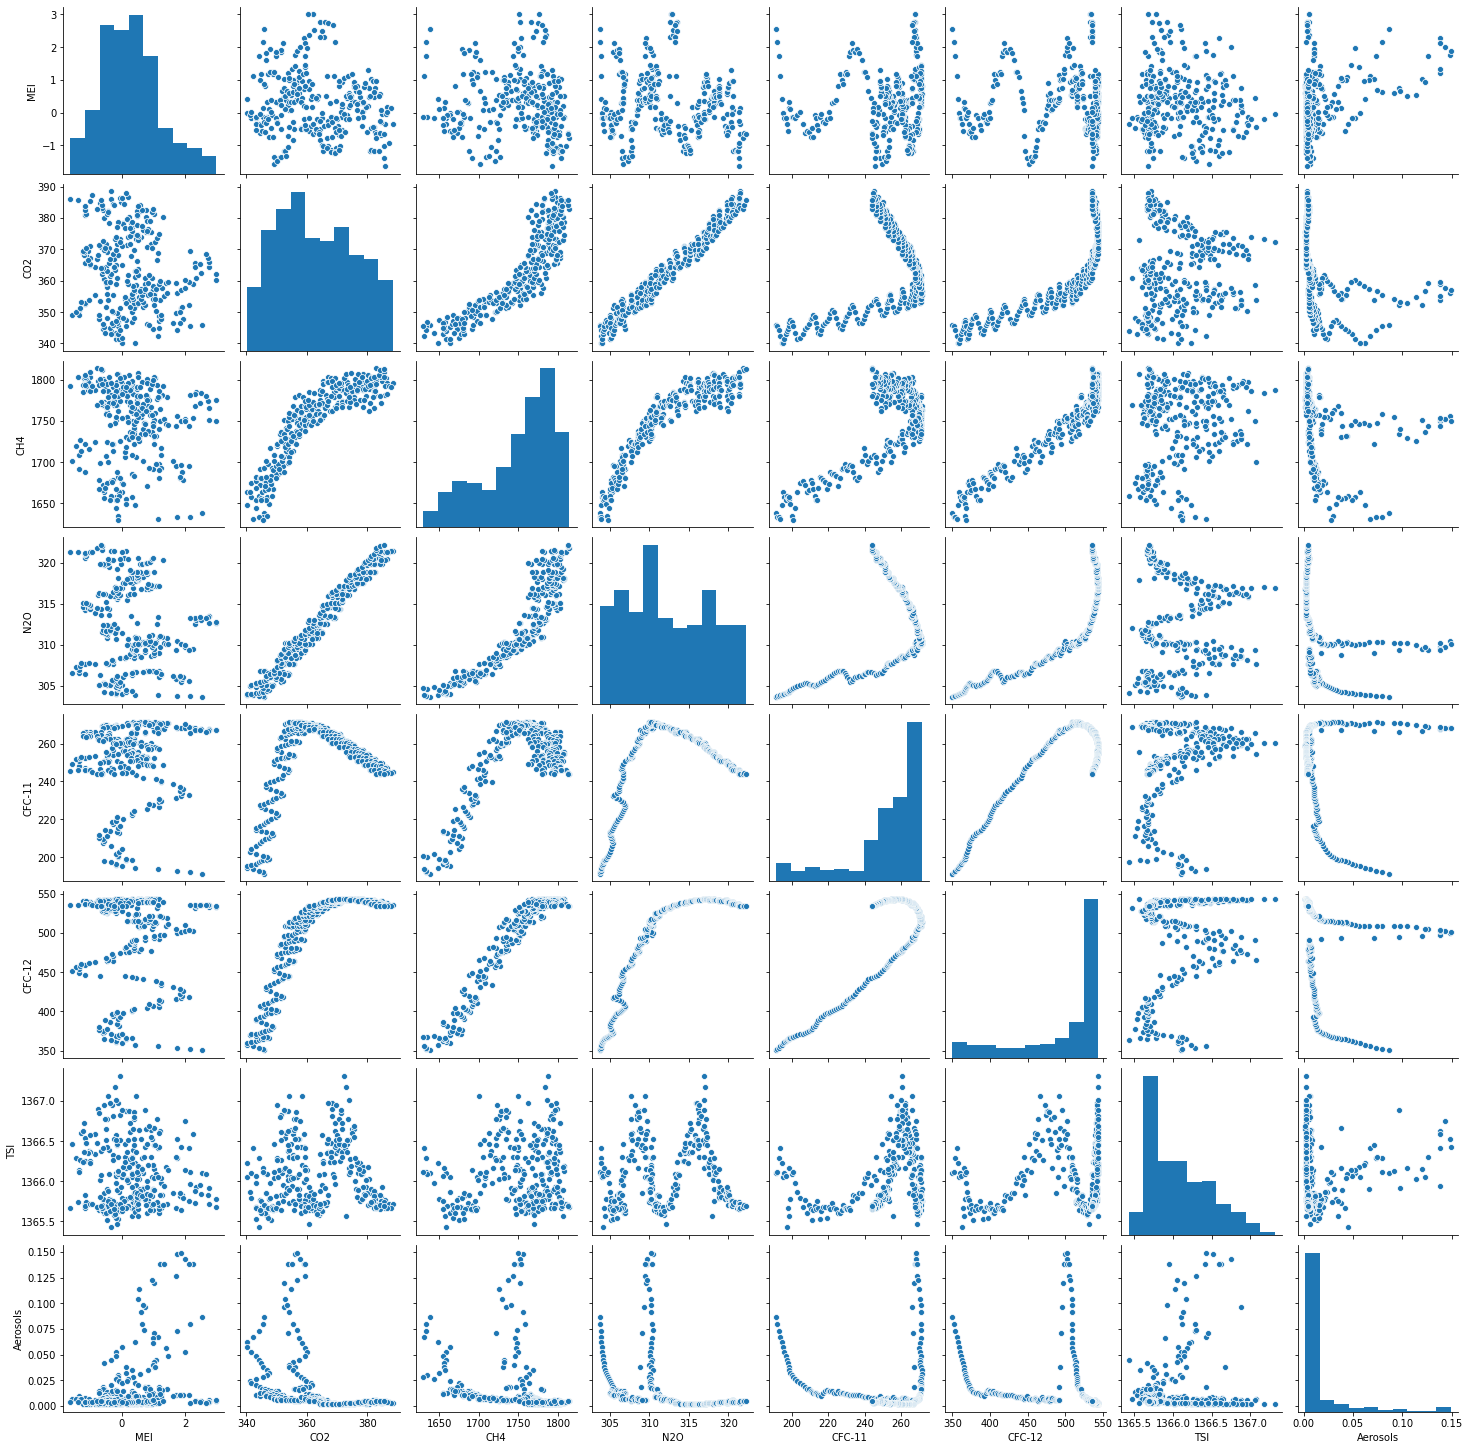

In [ ]:
sn.pairplot(climate_change)

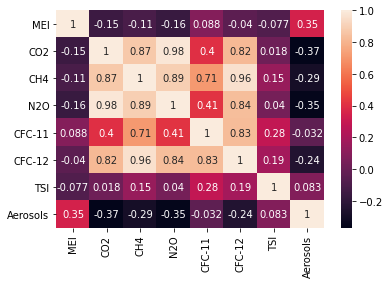

In [ ]:
corrMatrix = climate_change.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

**Quelles variables pensez-vous enlever pour rendre le modéle plus performant en tenant compte du heatmap ci-dessus ? Enlevez-les, faites tourner le modéle et dessiner le learning curve**

In [77]:
# Simplifier le modéle en enlevant 'CH4', 'CO2', 'CFC-11' et 'CFC-12'
climate_change = climate_change.drop(['CH4','CO2','CFC-11','CFC-12'],axis=1)

**Dessiner à nouveau la matrice de corrélation**

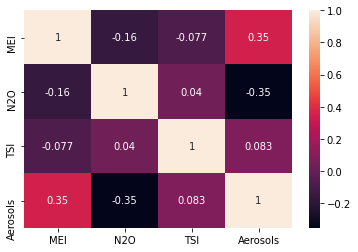

In [81]:
corrMatrix = climate_change.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [111]:
X_train,X_test,y_train,y_test = train_test_split(climate_change,y,test_size=0.20, random_state=42)
X_train_aug = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
X_test_aug = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
theta = trainLinearReg(linearRegCostFunction, X_train_aug, y_train, lambda_=0)
error_train,error_test = learningCurve(X_train_aug, y_train, X_test_aug, y_test, lambda_=0)

# Training Examples	Train Error	Cross Validation Error
  	1		0.010044	0.048951
  	2		0.013429	0.053859
  	3		0.046865	0.025543
  	4		0.044191	0.050316
  	5		0.046041	0.086707
  	6		0.025335	0.035174
  	7		0.020974	0.023163
  	8		0.015721	0.013215
  	9		0.013987	0.012935
  	10		0.012748	0.015133
  	11		0.016497	0.015540
  	12		0.018110	0.014373
  	13		0.017167	0.012661
  	14		0.016085	0.012895
  	15		0.015330	0.007932
  	16		0.014371	0.008024
  	17		0.013678	0.007801
  	18		0.013069	0.007202
  	19		0.012328	0.006944
  	20		0.011840	0.007175
  	21		0.011363	0.007079
  	22		0.010966	0.006962
  	23		0.010571	0.006925
  	24		0.010394	0.006865
  	25		0.010225	0.006569
  	26		0.009832	0.006594
  	27		0.009489	0.006538
  	28		0.009361	0.006913
  	29		0.010905	0.006573
  	30		0.010621	0.006697
  	31		0.010360	0.007032
  	32		0.010349	0.006109
  	33		0.010095	0.006217
  	34		0.009950	0.006368
  	35		0.009660	0.006361
  	36		0.009387	0.006344
  	37		0.009164	0.006425
  	38		0.008927	0.006405
  	3

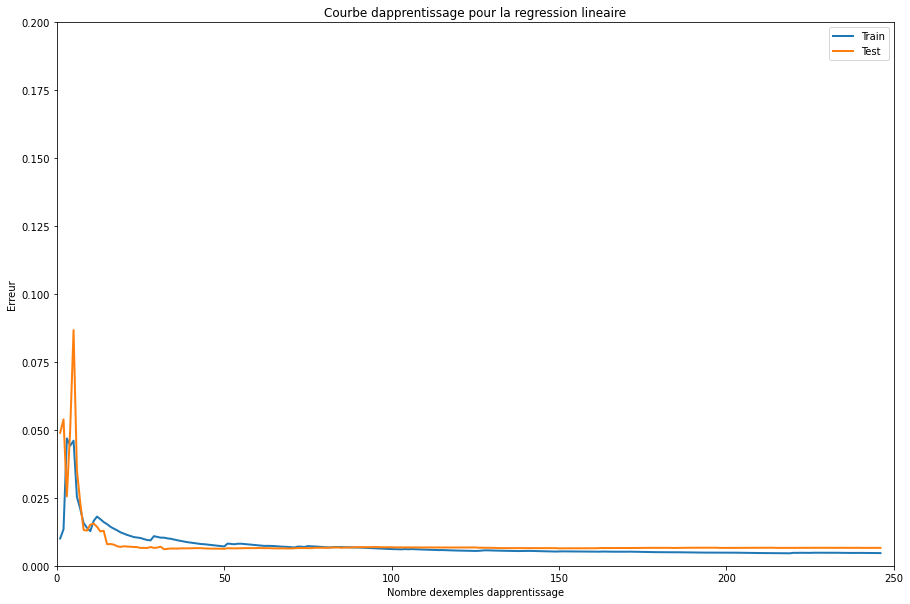

In [112]:
m = y_train.size
fig= plt.figure(figsize=(15,10))
plt.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_test, lw=2)
plt.title('Courbe d''apprentissage pour la regression lineaire')
plt.legend(['Train', 'Test'])
plt.xlabel('Nombre d''exemples d''apprentissage')
plt.ylabel('Erreur')
plt.axis([0, 250, 0, 0.2])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_test[i]))

**Est-ce que le modéle s'est amélioré? Justifier votre reponse**
**Est-ce que si nous ajoutons des  données, le modéle va s'améliorer? Justifier votre réponse**

**Est-ce qu'il est utile de complexifier le modéle?Justifier votre réponse**

**Formule analytique**

Utiliser la formula nalytique pour calculer theta et comparer le au theta que vous avez trouvé précédemment

In [117]:
Z = climate_change.to_numpy()
Z = np.concatenate([np.ones((Z.shape[0], 1)), Z], axis=1)

In [118]:
theta2 = np.matmul(np.linalg.pinv(np.matmul(Z.T,Z)),np.matmul(Z.T,y.to_numpy().reshape(-1,1)))

In [119]:
theta2, theta

(array([[ 0.25677597],
        [ 0.06564503],
        [ 0.12344884],
        [ 0.03707808],
        [-0.05267892]]),
 array([ 0.25660765,  0.06032775,  0.1280897 ,  0.03252969, -0.05073168]))

**Exercice**

Creer un modéle de regression linéaire en utilisant scikit-learn et faites de la prediction avec ce modele